# Time signal design

This notebook describes some fundamental aspects rgarding th design of a time signal to conduct plane wave propagation analysis. We use the useful wavelet of a Ricker pulse. Describe the pulse parameters and its effective properties when used in dynamic analysis.

## The Ricker Wavelet

The Ricker wavelet is a time signal defined by simple paramters allowing to produce time series with a perfectly known spectra. The time signal is defined by the following function:

$$f(t) = \left[ {1 - 2{\pi ^2}f_c^2{{(t - {t_c})}^2}} \right]{e^{ - {\pi ^2}f_c^2{{(t - {t_c})}^2}}}$$

where $f_c$ is the dominant peak frequency of and $t_c$ defines the time location of the center peak. Th time width or breadth is given by $t_b$.

<center><img src="pulso.png" alt="pulso.png" style="width:400px"></center>

## Fourier analysis background

Consider a time series of maximum frequnency $f_{max}$. From the sampling thorem it follows that the signal must be sampled at least at a rate $\delta = 1/2/ f_{max}$. Consider now a signal of total duration $T$ sampled by $N$ points as shown blow:

<center><img src="esquema.png" alt="esquema.png" style="width:300px"></center>

The resulting effective sampling rate turns out to be:

$$\Delta t = \frac{T}{N}$$

allowing to effectivly describe frquencies up to:

$$f = \frac{N}{{2\Delta t}}$$

sampled at:

$$df = \frac{1}{{N\Delta t}}$$

## Design of the Ricker pulse

In [70]:
%matplotlib notebook
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import fourier as fou
from IPython.display import Image

The pulse itself has a duration (or breath) defined by its central frequency according to:

$${t_b} = \frac{{\sqrt 6 }}{{\pi {f_c}}}.$$

However for analysis purposes it is convenient to locate the pulse within a general signal of duration $T_t$ and to compute the pulse numerically we need to define the total number of time samples $N$ making sure that we keep at last the minimum required sampling rate. Consider the following set of parameters:

Breadth = 0.779696801234 s


<IPython.core.display.Javascript object>


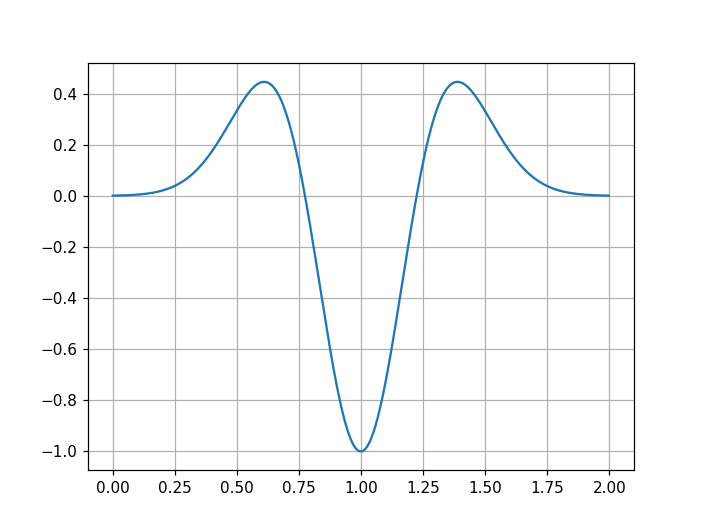

In [71]:
N = 1024
T_t = 2.0
tc = 1.0
fc = 1.0
t_b = np.sqrt(6)/np.pi/fc
print ("Breadth =") , t_b , ('s')
Rick , time = fou.ricker(N , T_t , tc, fc)
fou.grafsignalG(Rick , T_t/N , 0)

Notice the amplitude spectra can be reproduced up to:

In [72]:
print ('Effctive maximum frquency =') , N/2.0/T_t
print ('Effective time step=') , T_t/N

Effctive maximum frquency = 256.0
Effective time step= 0.001953125


Now, conducting direct fourier transform of the above time signal we obtain the corresponding Fourier amplitude spectra spectra:

<IPython.core.display.Javascript object>


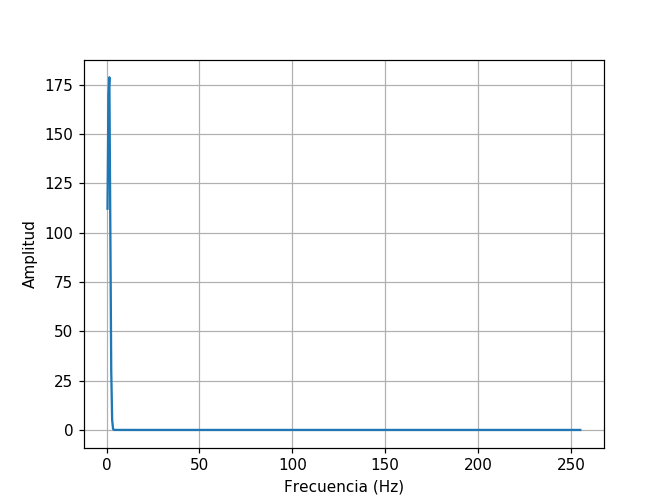

In [73]:
FS = 10.0
x , Samag , A , nfs = fou.Ftrans(Rick , N , T_t/N , FS)
fou.grafFourier(Samag , x , nfs , 1)

We can also perform invesre Fourier transform to get the time signal once again as follows:

<IPython.core.display.Javascript object>


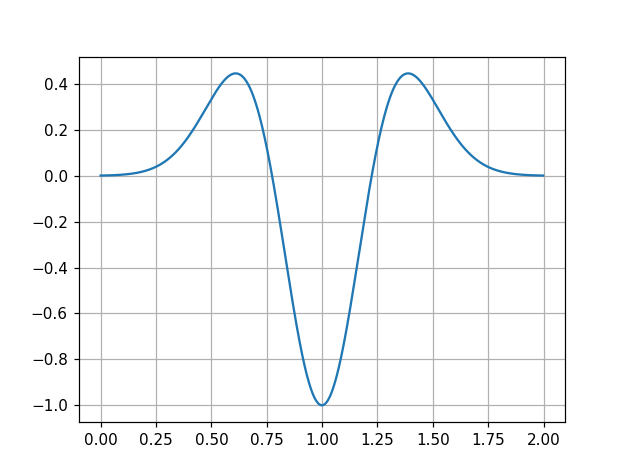

In [75]:
ZZ = np.fft.ifft(A)
ZZ = np.real(ZZ)
fou.grafsignalG(ZZ , T_t/N , 2)